# The case is just for fun, I will try to use the Kilometres that a car has driven plus the Price of the car to predict what year of the car was made.
## Here is my code.

In [233]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [234]:
data = pd.read_csv('/Users/haitonghuang/Downloads/Quikr_car.csv')

In [235]:
data

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai
3,3,Hyundai Venue - 2019,PLATINUM,Chennai,"₹10,19,699","16,112 kms",Petrol,2nd Owner,2019,Hyundai
4,4,Honda Jazz - 2017,PLATINUM,Pune,"₹7,13,499","30,988 kms",Petrol,2nd Owner,2017,Honda
...,...,...,...,...,...,...,...,...,...,...
1027,1027,Hyundai i10 Magna 1.2 - 2014,GOLD,Bangalore,"₹2,29,000","65,000 kms",Petrol,1st Owner,2014,Hyundai
1028,1028,Maruti Suzuki Alto K10 LXi CNG - 2014,GOLD,Bangalore,"₹2,75,000","60,000 kms",Petrol,NaN,2014,Maruti
1029,1029,Jeep Compass Limited 2.0 Diesel - 2017,GOLD,Mahasamund,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep
1030,1030,Jeep Compass Limited 2.0 Diesel - 2017,GOLD,Bilaspur,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep


In [236]:
data['Name'] = data['Name'].str.split('-').str[0]
data

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,0,Ford Figo Duratec Petrol EXI 1.2,PLATINUM,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,1,Maruti Suzuki Wagon R VXI BS IV,PLATINUM,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,2,Hyundai Creta 1.6 SX PLUS AUTO PETROL,PLATINUM,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai
3,3,Hyundai Venue,PLATINUM,Chennai,"₹10,19,699","16,112 kms",Petrol,2nd Owner,2019,Hyundai
4,4,Honda Jazz,PLATINUM,Pune,"₹7,13,499","30,988 kms",Petrol,2nd Owner,2017,Honda
...,...,...,...,...,...,...,...,...,...,...
1027,1027,Hyundai i10 Magna 1.2,GOLD,Bangalore,"₹2,29,000","65,000 kms",Petrol,1st Owner,2014,Hyundai
1028,1028,Maruti Suzuki Alto K10 LXi CNG,GOLD,Bangalore,"₹2,75,000","60,000 kms",Petrol,NaN,2014,Maruti
1029,1029,Jeep Compass Limited 2.0 Diesel,GOLD,Mahasamund,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep
1030,1030,Jeep Compass Limited 2.0 Diesel,GOLD,Bilaspur,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep


In [237]:
data.head()

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,0,Ford Figo Duratec Petrol EXI 1.2,PLATINUM,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,1,Maruti Suzuki Wagon R VXI BS IV,PLATINUM,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,2,Hyundai Creta 1.6 SX PLUS AUTO PETROL,PLATINUM,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai
3,3,Hyundai Venue,PLATINUM,Chennai,"₹10,19,699","16,112 kms",Petrol,2nd Owner,2019,Hyundai
4,4,Honda Jazz,PLATINUM,Pune,"₹7,13,499","30,988 kms",Petrol,2nd Owner,2017,Honda


In [246]:
data = data[['Kms_driven','Price','Year']]
data['Price'] = data['Price'].str.replace(',', '')
data['Price'] = data['Price'].str.replace('₹', '')


data['Kms_driven'] = data['Kms_driven'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
data

,Kms_driven,Price,Year
0,35056,380000,2015
1,44000,465000,2016
2,42917,1350000,2018
3,16112,1019699,2019
4,30988,713499,2017
...,...,...,...
1027,65000,229000,2014
1028,60000,275000,2014
1029,31000,1750000,2017
1030,31000,1750000,2017


In [247]:
data.dtypes

Kms_driven     int64
Price         object
Year           int64
dtype: object

In [252]:

data = data[data.Price != 'Ask For Price']
data

,Kms_driven,Price,Year
0,35056,380000,2015
1,44000,465000,2016
2,42917,1350000,2018
3,16112,1019699,2019
4,30988,713499,2017
...,...,...,...
1027,65000,229000,2014
1028,60000,275000,2014
1029,31000,1750000,2017
1030,31000,1750000,2017


In [253]:
data['Price'].astype(float)

0        380000.0
1        465000.0
2       1350000.0
3       1019699.0
4        713499.0
          ...    
1027     229000.0
1028     275000.0
1029    1750000.0
1030    1750000.0
1031    1750000.0
Name: Price, Length: 1026, dtype: float64

#### **Let's store the data in forms of dependent and independent variables**

In [257]:
X = data.iloc[:,0:2].values

In [258]:
Y = data.iloc[:,-1].values

In [259]:
X

array([[35056, '380000'],
       [44000, '465000'],
       [42917, '1350000'],
       ...,
       [31000, '1750000'],
       [31000, '1750000'],
       [31000, '1750000']], dtype=object)

#### **Split the dataset into traning and testing dataset**

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

#### **Import the Decision Tree Regressor**

In [310]:
from sklearn.tree import DecisionTreeRegressor

DtReg = DecisionTreeRegressor(max_depth = 5, random_state = 0)

DtReg.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

#### **Predicted Year from test dataset**

In [311]:
y_predict = DtReg.predict((X_test))
plt.figure(figsize=(15, 20))
y_predict

array([2019.49019608, 2017.42857143, 2015.60493827, 2017.        ,
       2015.02564103, 2016.33980583, 2017.        , 2016.33980583,
       2018.31707317, 2016.33980583, 2015.60493827, 2015.60493827,
       2015.02564103, 2017.42857143, 2015.02564103, 2017.42857143,
       2017.        , 2017.42857143, 2016.33980583, 2017.42857143,
       2018.31707317, 2017.        , 2015.02564103, 2016.33980583,
       2017.        , 2013.25      , 2017.42857143, 2017.        ,
       2013.25      , 2015.02564103, 2015.02564103, 2016.33980583,
       2015.60493827, 2017.42857143, 2019.49019608, 2015.60493827,
       2008.66666667, 2017.42857143, 2015.60493827, 2003.92307692,
       2016.33980583, 2016.33980583, 2017.42857143, 2017.42857143,
       2017.        , 2014.47368421, 2016.33980583, 2017.42857143,
       2019.49019608, 2018.31707317, 2015.60493827, 2016.33980583,
       2010.625     , 2017.42857143, 2018.31707317, 2017.42857143,
       2018.31707317, 2019.49019608, 2015.60493827, 2017.     

<Figure size 1080x1440 with 0 Axes>

## **Get the R square**

In [312]:
from sklearn import metrics
r_square = metrics.r2_score(Y_test, y_predict)
print('R-Square Error associated with Decision Tree Regression is:',r_square)

R-Square Error associated with Decision Tree Regression is: 0.6212454170178778


##### **The R square indicates the accuracy of our prediction. Here, very sad our R square is showing 62.12% accuracy**

[Text(163.9125, 199.32, 'X[1] <= 267049.5\nmse = 11.538\nsamples = 718\nvalue = 2015.827'),
 Text(82.305, 163.07999999999998, 'X[1] <= 172500.0\nmse = 15.16\nsamples = 61\nvalue = 2008.77'),
 Text(44.64, 126.83999999999999, 'X[0] <= 57500.0\nmse = 10.782\nsamples = 29\nvalue = 2005.897'),
 Text(22.32, 90.6, 'X[1] <= 110000.0\nmse = 4.556\nsamples = 6\nvalue = 2010.333'),
 Text(11.16, 54.359999999999985, 'X[0] <= 32500.0\nmse = 2.25\nsamples = 4\nvalue = 2011.5'),
 Text(5.58, 18.119999999999976, 'mse = 0.0\nsamples = 1\nvalue = 2014.0'),
 Text(16.740000000000002, 18.119999999999976, 'mse = 0.222\nsamples = 3\nvalue = 2010.667'),
 Text(33.480000000000004, 54.359999999999985, 'X[1] <= 137500.0\nmse = 1.0\nsamples = 2\nvalue = 2008.0'),
 Text(27.9, 18.119999999999976, 'mse = 0.0\nsamples = 1\nvalue = 2007.0'),
 Text(39.06, 18.119999999999976, 'mse = 0.0\nsamples = 1\nvalue = 2009.0'),
 Text(66.96000000000001, 90.6, 'X[1] <= 93000.0\nmse = 5.932\nsamples = 23\nvalue = 2004.739'),
 Text(55.8

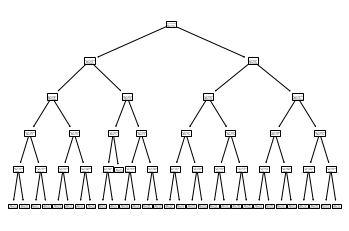

In [318]:
from sklearn import tree
tree.plot_tree(DtReg)

In [319]:
from sklearn.tree import export_graphviz

### The code below will generate us a dot file, then copy the code within the dot file and go to http://www.webgraphviz.com/ paste the code in the column, so that we can see our plot clearly.
### However I think the garph is overfitting. 

In [320]:
export_graphviz(DtReg, out_file = 'dtregression.dot' ,
                feature_names = ['Kms_driven','Price'])

### By inputing Km_driven and price, the model will generate a prediction of the year of the car.

In [321]:
prediction = DtReg.predict([[18888,420000]])
prediction

array([2017.])